# Welcome to DeepSVR Data Analysis

### Please designate your input files below:

In [1]:
predictions_file = '../predictions.tsv'

call_file = '../test/call.pkl'


## Tools

In [2]:
%aimport manual_review_classifier
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from manual_review_classifier.ClassifierPlots import create_reliability_diagram, create_roc_curve, create_feature_importance_plot, make_model_output_plot


sns.set_style("white")
sns.set_context('talk')

ERROR:root:Line magic function `%aimport` not found.


## Read in Input Files

In [3]:
predictions = pd.read_csv(str(predictions_file), sep='\t')
calls = pd.read_pickle(str(call_file))

In [4]:
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}

def create_ROC(calls_path, probs):

    call=calls_path.map(str.lower).replace('g','f').replace('s\x03', 's').replace('', 'f')
    print(call.value_counts())
    # Get Labels
    Y = pd.get_dummies(call, columns=['a','f','s']).astype(float).values

    probs = probs.as_matrix(columns=['Ambiguous', 'Fail', 'Somatic'])

    fig, ax = plt.subplots(figsize=(8,6),dpi=200)
    create_roc_curve(Y, probs, class_lookup,'Receiver Operating Characteristic - Deep Learning', ax)
    plt.show()
    plt.close()


def create_reliability(calls_path, probs):

    call=calls_path.map(str.lower).replace('g','f').replace('s\x03', 's').replace('', 'f')
    print(call.value_counts())
    # Get Labels
    Y = pd.get_dummies(call, columns=['a','f','s']).astype(float).values

    probs = probs.as_matrix(columns=['Ambiguous', 'Fail', 'Somatic'])

    fig, ax = plt.subplots(figsize=(8,6),dpi=200)
    lgd = create_reliability_diagram(probs, Y,
                                     ['Ambiguous','Fail','Somatic'], 
                                     'cornflowerblue', 
                                     'Reliability Diagram - Deep Learning',
                                     ax, True, True, True)
    lgd.set_bbox_to_anchor((0.1, .85))
    plt.show()
    plt.close()

def create_model_output(calls_path, probs):

    call=calls_path.map(str.lower).replace('g','f').replace('s\x03', 's').replace('', 'f')
    print(call.value_counts())
    # Get Labels
    Y = pd.get_dummies(call, columns=['a','f','s']).astype(float).values

    probs = probs.as_matrix(columns=['Ambiguous', 'Fail', 'Somatic'])

    fig, ax = plt.subplots(figsize=(8,6),dpi=200)
    make_model_output_plot(probs, 'Deep learning output distributions')
    plt.show()
    plt.close()

s    7
f    2
a    1
Name: call, dtype: int64


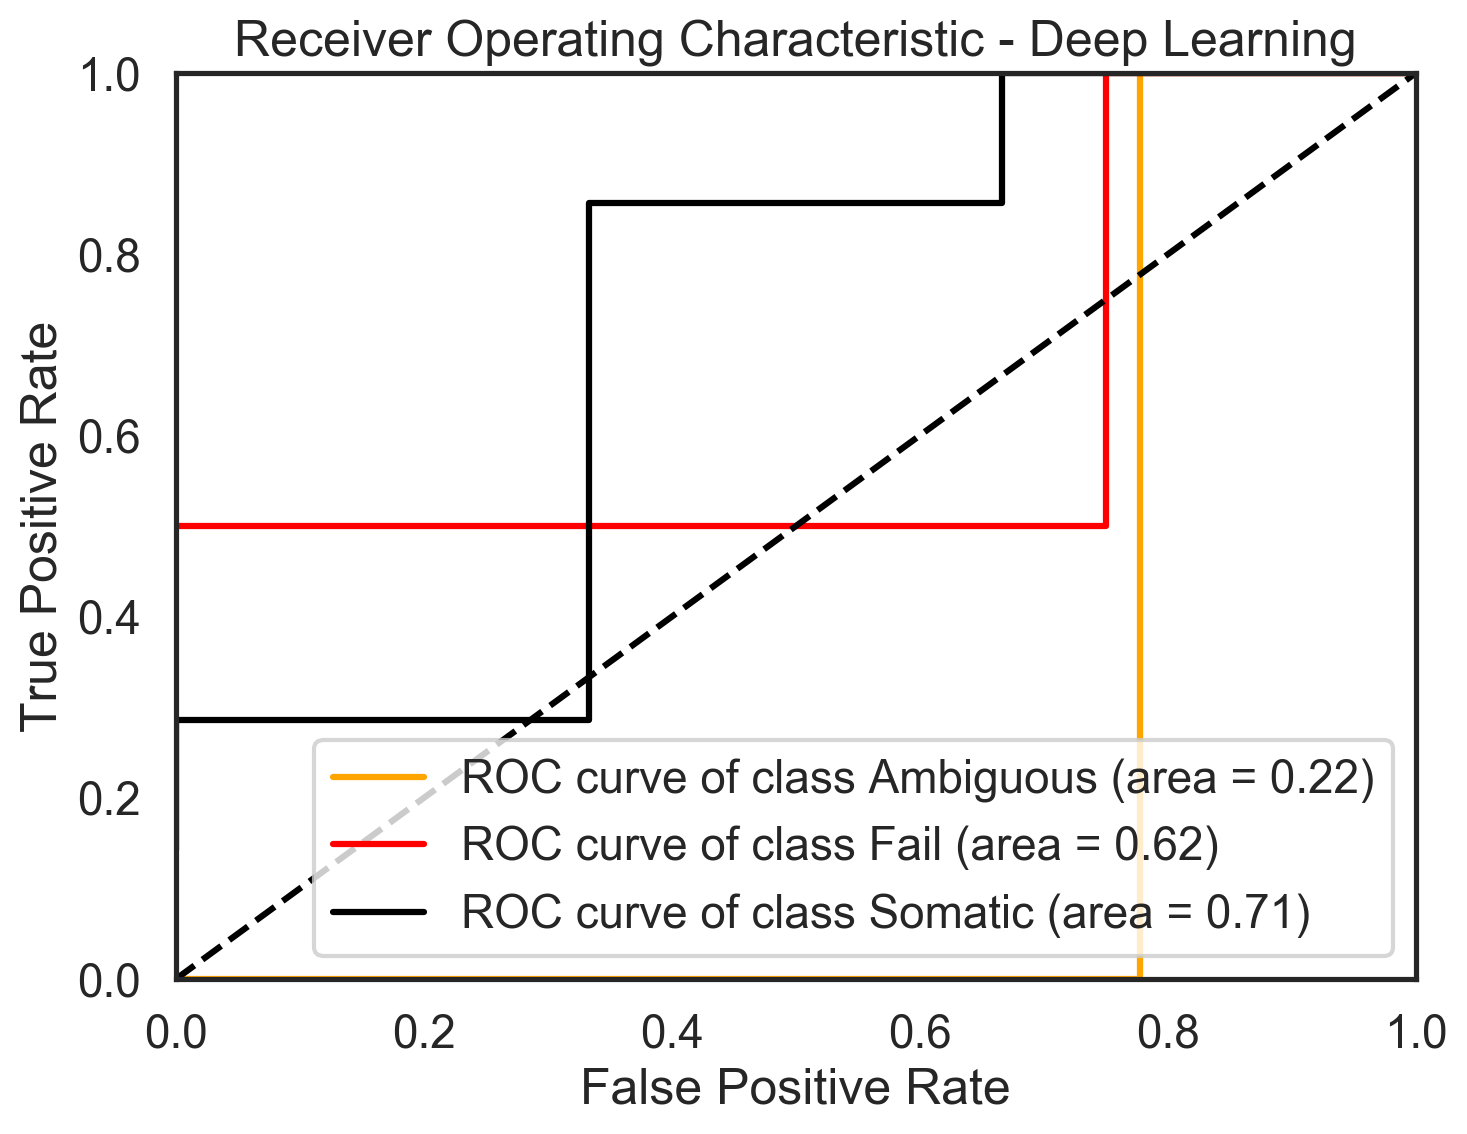

In [5]:
create_ROC(calls, predictions)

s    7
f    2
a    1
Name: call, dtype: int64
confidence intervals +-:  [        nan  0.10213765  0.34471456  0.10213765  0.26536139  0.12895351
         nan         nan         nan         nan]


/Users/ebarnell/anaconda3/lib/python3.6/site-packages/manual_review_classifier/ClassifierPlots.py:61: RuntimeWarning: invalid value encountered in true_divide
  pct_positive = positive_counts / (positive_counts + negative_counts)
/Users/ebarnell/anaconda3/lib/python3.6/site-packages/manual_review_classifier/ClassifierPlots.py:70: RuntimeWarning: divide by zero encountered in true_divide
  inverse_n = 1/(positive_counts+negative_counts)
/Users/ebarnell/anaconda3/lib/python3.6/site-packages/manual_review_classifier/ClassifierPlots.py:71: RuntimeWarning: invalid value encountered in multiply
  con_ints = z * np.sqrt(inverse_n * pct_positive * pct_negative)


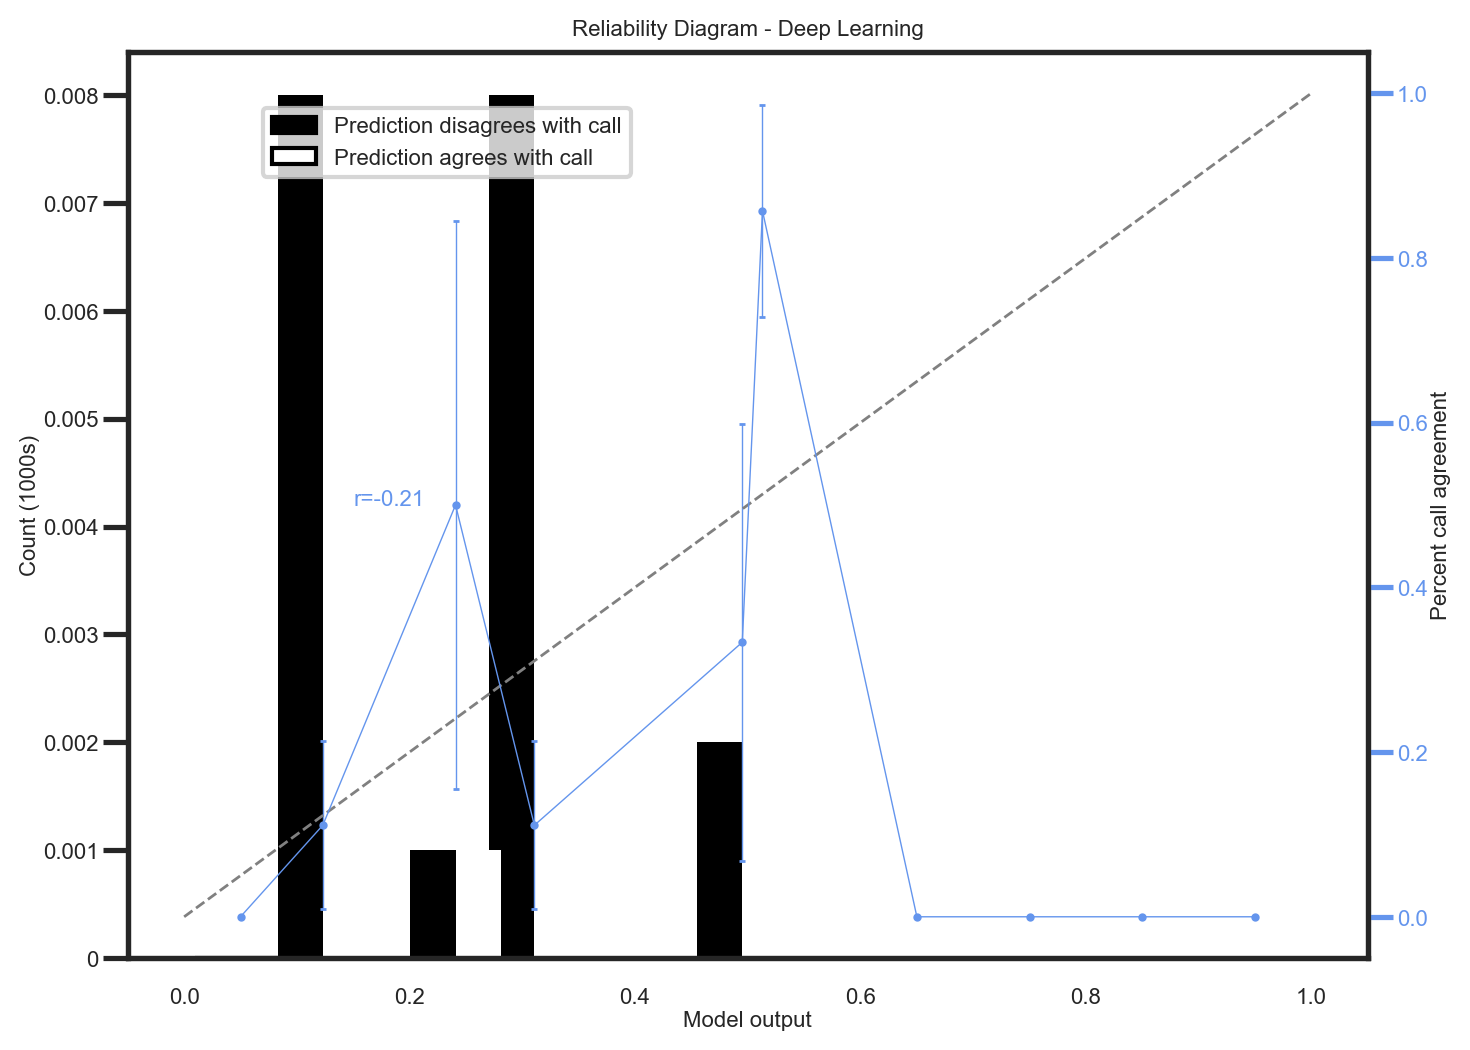

In [6]:
create_reliability(calls, predictions)

s    7
f    2
a    1
Name: call, dtype: int64


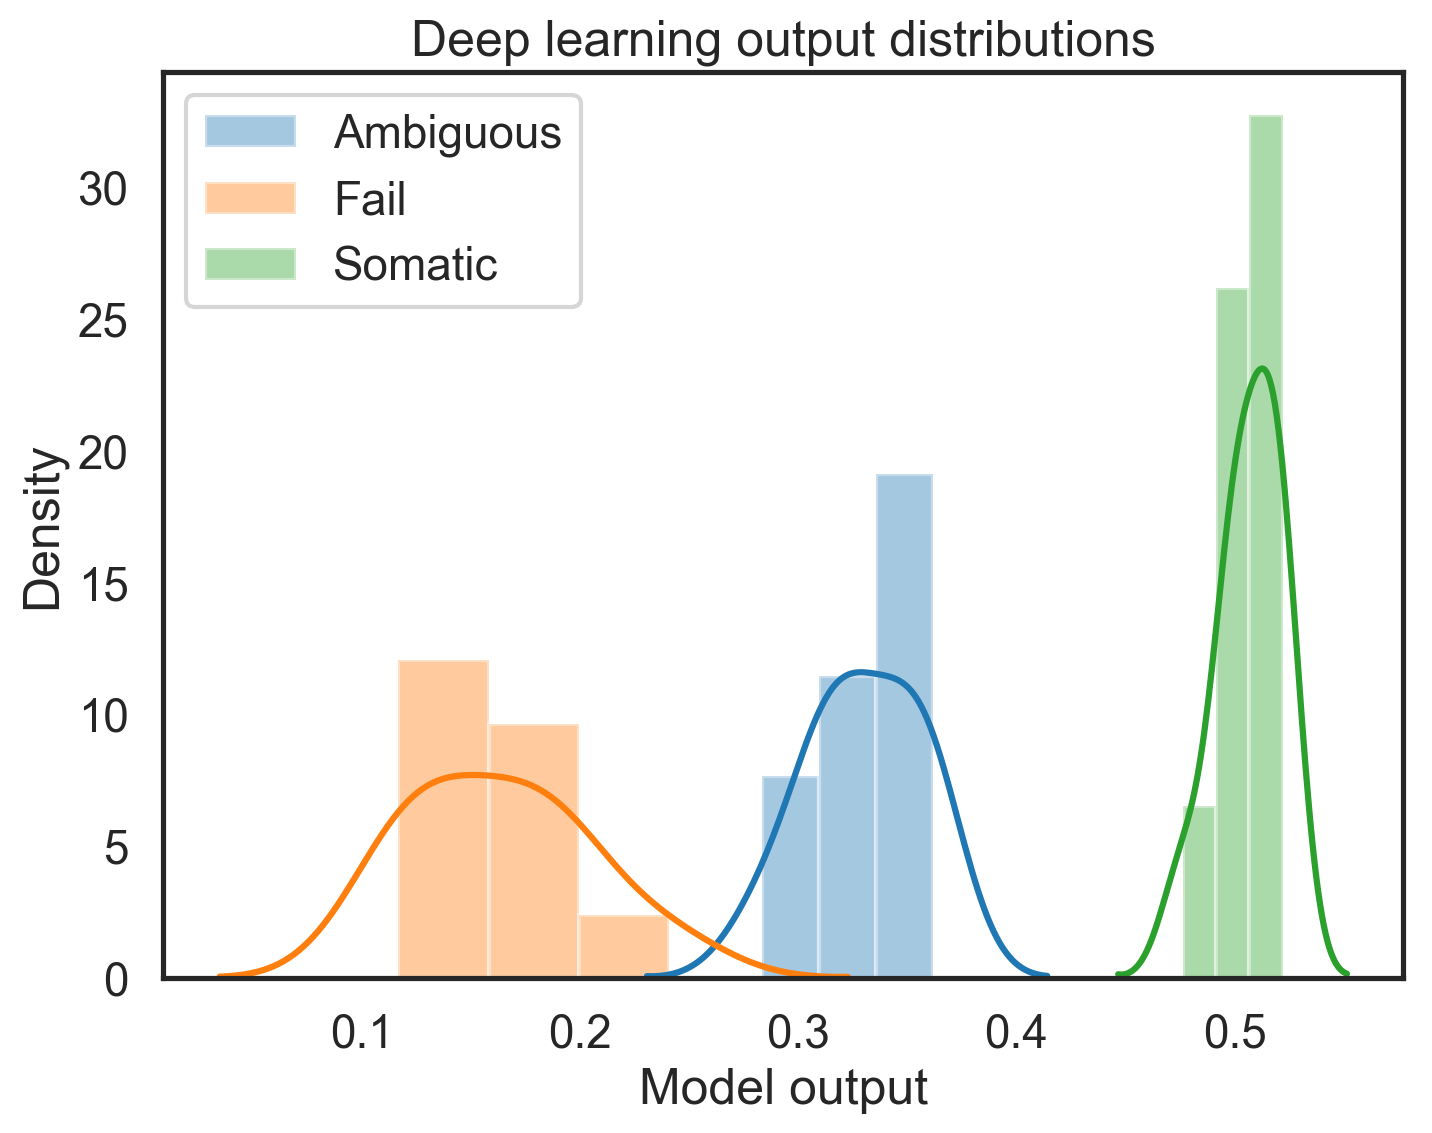

In [7]:
create_model_output(calls, predictions)